Problem Set 3: Deep Learning & Unsupervised learning
http://cs229.stanford.edu/ps/ps3/ps3.pdf

## 3.5 K-means for compression

### 3.5.a.

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# download images
def download_file(URL=None):
    import httplib2
    h = httplib2.Http(".cache")
    resp, content = h.request(URL, "GET")
    return content

download_file('http://cs229.stanford.edu/ps/ps3/mandrill-small.tiff')
download_file('http://cs229.stanford.edu/ps/ps3/mandrill-large.tiff')

b'<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>404 Not Found</title>\n</head><body>\n<h1>Not Found</h1>\n<p>The requested URL /ps/ps3/mandrill-large.tiff was not found on this server.</p>\n</body></html>\n'

In [5]:
# load images
pic_large = imread('./mandrill-large.tiff')
pic_small = imread('./mandrill-small.tiff')

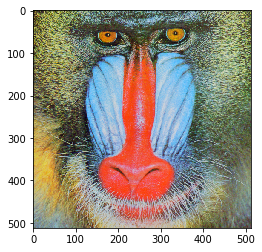

In [12]:
plt.imshow(pic_large)

In [13]:
pic_large.shape

(512, 512, 3)

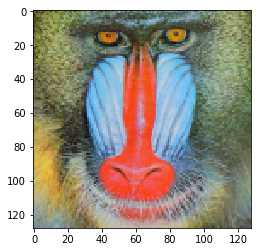

In [14]:
plt.imshow(pic_small)

In [15]:
pic_small.shape

(128, 128, 3)

### 3.5.b.

In [42]:
# k-means
def k_means(X, cluster_num):
    # pic centroids randomly
    idxs = np.random.choice(np.arange(X.shape[0]), size = cluster_num, replace = False)
    centroids = X[idxs]
    
    error = 1e5
    while (error > 1):
        # assign points to cluster
        distances = []
        for c in centroids:
            dist = np.sqrt(np.sum((X - c) ** 2, axis = 1))
            distances.append(dist)
        point_cluster = np.stack(distances).argmin(axis = 0)
        
        # move cluster
        centroids_new = []
        for i in range(cluster_num):
            points = X[np.where(point_cluster == i)[0]]
            center = np.mean(points, axis = 0)
            centroids_new.append(center)
            
        centroids_new = np.stack(centroids_new)
        error = np.sum(np.abs(centroids_new - centroids))
        centroids = centroids_new
    return centroids

In [43]:
X = pic_small.reshape(-1, 3)
centroids = k_means(X, 16)

### 3.5.c.

In [67]:
def find_neareset_centroid(X, centroids):
    distances = []
    for c in centroids:
        dist = np.sqrt(np.sum((X - c) ** 2, axis = 1))
        distances.append(dist)
    point_cluster = np.stack(distances).argmin(axis = 0)
    return point_cluster

def get_centroid_colors(X, point_cluster, centroids):
    compressed = np.zeros_like(X)
    for k in range(centroids.shape[0]):
        idxes = np.where(point_cluster == k)[0]
        compressed[idxes] = centroids[k]
    return compressed

In [73]:
X_large = pic_large.reshape(-1, 3)
point_cluster = find_neareset_centroid(X_large, centroids)
X_compress = get_centroid_colors(X_large, point_cluster, centroids)
pic_compress = X_compress.reshape(pic_large.shape)
print(pic_compress.shape)

(512, 512, 3)


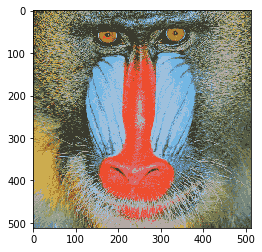

In [69]:
plt.imshow(pic_compress)

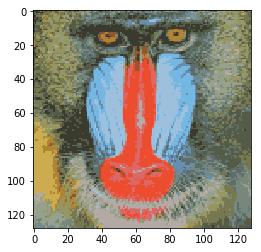

In [71]:
point_cluster_small = find_neareset_centroid(X, centroids)
X_compress_small = get_centroid_colors(X, point_cluster_small, centroids)
pic_compress_small = X_compress_small.reshape(pic_small.shape)
plt.imshow(pic_compress_small)

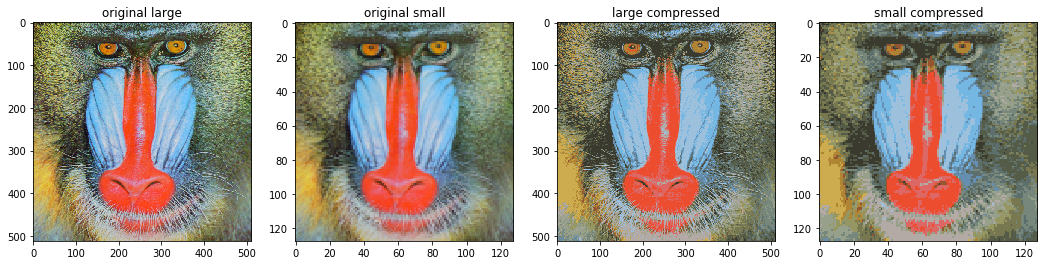

In [72]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(pic_large)
ax0.set_title('original large')
ax1.imshow(pic_small)
ax1.set_title('original small')
ax2.imshow(pic_compress)
ax2.set_title('large compressed')
ax3.imshow(pic_compress_small)
ax3.set_title('small compressed')

### 3.5.d.

In [75]:
import pandas as pd
large_shape = pd.DataFrame(X_large).drop_duplicates().shape
compress_shape = pd.DataFrame(X_compress).drop_duplicates().shape
print(large_shape, compress_shape)

(230427, 3) (16, 3)


In [76]:
factor = large_shape[0] / compress_shape[0]
print(factor)

14401.6875
